In [ ]:
import zipfile
import os

# Unzip the dataset
zip_path = "/content/concept_shap_dataset.zip"
extract_path = "/content/concept_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check contents
print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['concept_shap_dataset']


In [ ]:
# STEP 1: Imports
import os
import numpy as np
import shap
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import zipfile
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images_from_folder(folder_path, target_size=(224, 224), max_images=None):
    images = []
    filenames = os.listdir(folder_path)
    for i, file in enumerate(filenames):
        if max_images and i >= max_images:
            break
        img_path = os.path.join(folder_path, file)
        img = load_img(img_path, target_size=target_size)
        img = img_to_array(img)
        images.append(img)
    return np.array(images)

concept_images = load_images_from_folder('/content/concept_data/concept_shap_dataset/concept')
mri_images = load_images_from_folder('/content/concept_data/concept_shap_dataset/random')


IsADirectoryError: [Errno 21] Is a directory: '/content/concept_data/concept_shap_dataset/concept/white_ball'

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/new_mri.keras')  # Replace with actual path


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# STEP 3: Load Your Trained Model and Bottleneck Layer
model = load_model('/content/new_mri.keras')  # Your trained model
intermediate_layer_name = 'bottleneck'

# Create intermediate model for bottleneck output
from tensorflow.keras.models import Model
bottleneck_output = model.get_layer(intermediate_layer_name).output
bottleneck_model = Model(inputs=model.input, outputs=bottleneck_output)

print("✅ Bottleneck model ready")


✅ Bottleneck model ready


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
def load_images_from_folder(folder_path, image_size=(224, 224), grayscale=True):
    images = []
    for fname in sorted(os.listdir(folder_path)):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder_path, fname)
            img = load_img(path, target_size=image_size, color_mode='grayscale' if grayscale else 'rgb')
            img = img_to_array(img) / 255.0
            images.append(img)
    return np.array(images)

# STEP 5: Load Concept and MRI Images
concept_path ='/content/concept_data/concept_shap_dataset/concept'
mri_path = '/content/concept_data/concept_shap_dataset/random'

In [ ]:
concept_images = load_images_from_folder(concept_path)
mri_images = load_images_from_folder(mri_path)

In [ ]:
# Add channel dimension if grayscale
if len(concept_images.shape) == 3:
    concept_images = np.expand_dims(concept_images, axis=-1)
if len(mri_images.shape) == 3:
    mri_images = np.expand_dims(mri_images, axis=-1)

print("✅ Loaded", len(concept_images), "concept images and", len(mri_images), "MRI images")

✅ Loaded 60 concept images and 253 MRI images


In [ ]:
# STEP 6: Extract Activations
concept_acts = bottleneck_model.predict(concept_images, verbose=0)
mri_acts = bottleneck_model.predict(mri_images, verbose=0)

In [ ]:
# STEP 7: Define Dummy Model for Concept Similarity
def similarity_model(x):
    concept_mean = concept_acts.mean(axis=0).reshape(1, -1)
    x_flat = x.reshape((x.shape[0], -1))
    return cosine_similarity(x_flat, concept_mean)

In [ ]:
# STEP 8: SHAP Explanation
flat_mri_acts = mri_acts.reshape((mri_acts.shape[0], -1))
masker = shap.maskers.Independent(flat_mri_acts)

explainer = shap.Explainer(similarity_model, masker)
shap_values = explainer(flat_mri_acts)


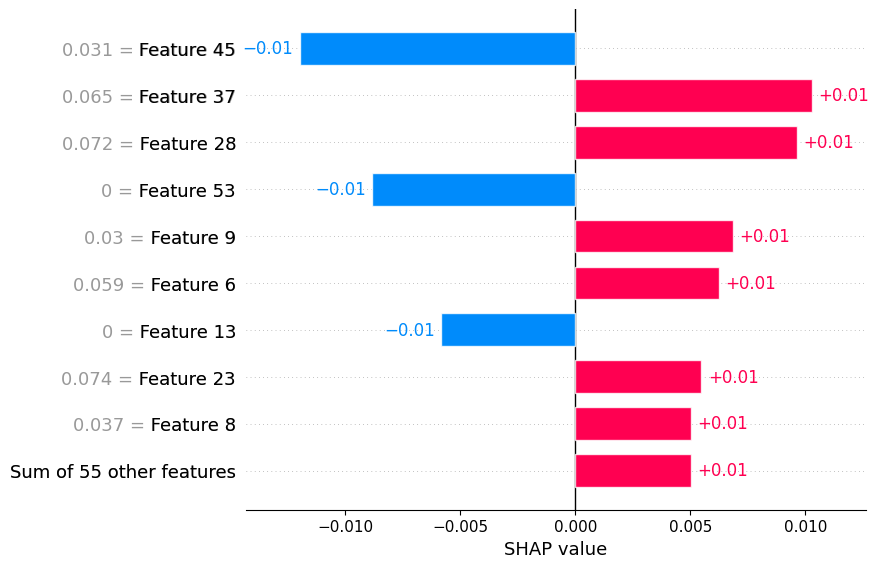

In [ ]:
# STEP 9: Visualize
shap.plots.bar(shap_values[0], max_display=10)

In [ ]:
!pip install shap


In [ ]:
import shap


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
✅ ConceptSHAP score for 'white_ball': 0.4171
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
✅ ConceptSHAP score for 'assymetric': 0.7734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
✅ ConceptSHAP score for 'edema': 0.7256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
✅ ConceptSHAP score for 'ring_enhancement': 0.6779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
✅ ConceptSHAP score for 'symm': 0.7721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ ConceptSHAP score for 'clean_brain ': 0.7637


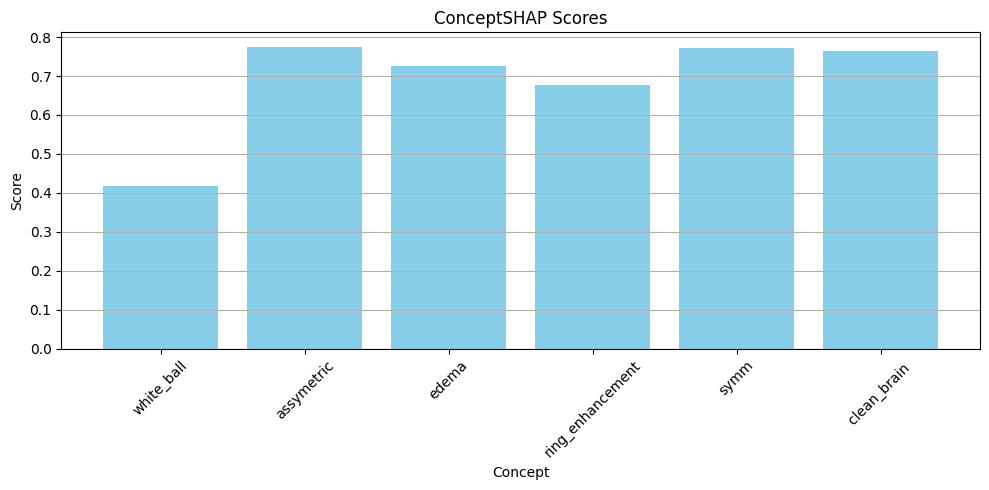

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model, Model
import shap
import matplotlib.pyplot as plt

# Define paths
concepts_base_path = "/content/concept_data/concept_shap_dataset/concept"
background_path = "/content/concept_data/concept_shap_dataset/random"
model_path = "/content/new_mri.keras"
intermediate_layer_name = "bottleneck"  # Change if needed

# Load model and create bottleneck model
model = load_model(model_path)
bottleneck_output = model.get_layer(intermediate_layer_name).output
bottleneck_model = Model(inputs=model.input, outputs=bottleneck_output)

# Helper function to load images
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images_from_folder(folder_path, target_size=(224, 224), color_mode='grayscale', max_images=None):
    images = []
    filenames = os.listdir(folder_path)
    for i, file in enumerate(filenames):
        if max_images and i >= max_images:
            break
        img_path = os.path.join(folder_path, file)
        img = load_img(img_path, target_size=target_size, color_mode=color_mode)
        img = img_to_array(img)
        images.append(img)
    return np.array(images)

# Load background images
background_images = load_images_from_folder(background_path)

background_features = bottleneck_model.predict(background_images)

# Loop through all concept folders
concept_scores = {}
for concept_name in os.listdir(concepts_base_path):
    concept_folder = os.path.join(concepts_base_path, concept_name)
    if not os.path.isdir(concept_folder):
        continue
    concept_images = load_images_from_folder(concept_folder)
    concept_features = bottleneck_model.predict(concept_images)

    # Compute ConceptSHAP score (cosine similarity)
    similarities = cosine_similarity(concept_features, background_features)

    mean_score = np.mean(similarities)
    concept_scores[concept_name] = mean_score
    print(f"✅ ConceptSHAP score for '{concept_name}': {mean_score:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.bar(concept_scores.keys(), concept_scores.values(), color='skyblue')
plt.title("ConceptSHAP Scores")
plt.xlabel("Concept")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
🔍 Test image similarity to 'white_ball': 0.4398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
🔍 Test image similarity to 'assymetric': 0.7743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
🔍 Test image similarity to 'edema': 0.8344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
🔍 Test image similarity to 'ring_enhancement': 0.7701
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
🔍 Test image similarity to 'symm': 0.8841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
🔍 Test image similarity to 'clean_brain ': 0.8694


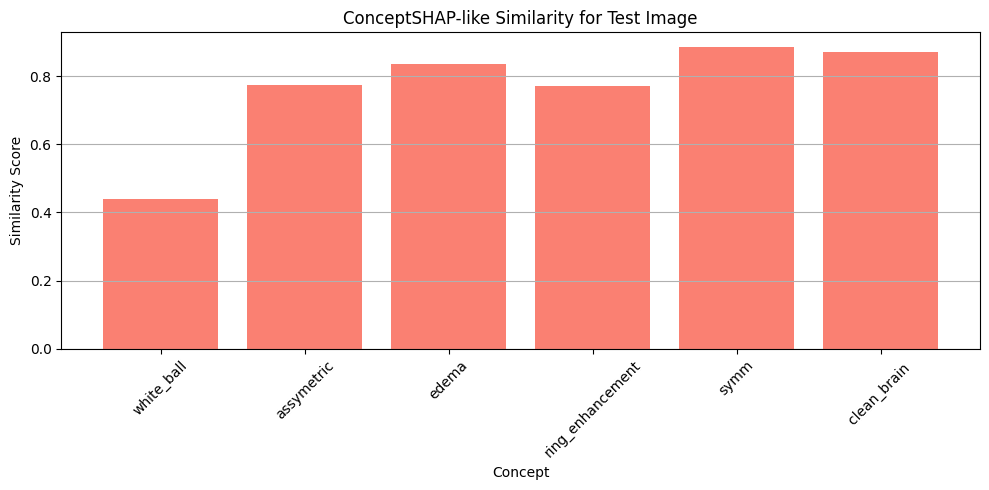

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Load a test image
test_image_path = "/content/5 no.jpg"  # 🔁 Change this to your image
test_img = load_img(test_image_path, target_size=(224, 224), color_mode='grayscale')
test_img = img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)  # shape: (1, 224, 224, 1)

# Get its embedding
test_feature = bottleneck_model.predict(test_img)  # shape: (1, bottleneck_dim)

# Compare to each concept
test_concept_scores = {}
for concept_name in os.listdir(concepts_base_path):
    concept_folder = os.path.join(concepts_base_path, concept_name)
    if not os.path.isdir(concept_folder):
        continue

    concept_images = load_images_from_folder(concept_folder)
    concept_features = bottleneck_model.predict(concept_images)

    # Compute similarity of test image to all images in this concept
    sims = cosine_similarity(test_feature, concept_features)
    test_score = np.mean(sims)
    test_concept_scores[concept_name] = test_score
    print(f"🔍 Test image similarity to '{concept_name}': {test_score:.4f}")

# Plot similarity scores
plt.figure(figsize=(10, 5))
plt.bar(test_concept_scores.keys(), test_concept_scores.values(), color='salmon')
plt.title("ConceptSHAP-like Similarity for Test Image")
plt.xlabel("Concept")
plt.ylabel("Similarity Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

test_concept_scores = {}
concept_names = []
concept_vectors = []

# Loop through concept folders
for concept_name in os.listdir(concepts_base_path):
    concept_folder = os.path.join(concepts_base_path, concept_name)
    if not os.path.isdir(concept_folder):
        continue

    concept_images = load_images_from_folder(concept_folder)
    concept_features = bottleneck_model.predict(concept_images)

    # Store mean concept vector
    concept_mean_vector = np.mean(concept_features, axis=0)
    concept_vectors.append(concept_mean_vector)
    concept_names.append(concept_name)

# Stack concept vectors
concept_matrix = np.stack(concept_vectors)  # shape: (n_concepts, bottleneck_dim)

# Embed the test image
test_feature = bottleneck_model.predict(test_img)  # shape: (1, bottleneck_dim)

# Cosine similarity between test image and concept means
similarities = cosine_similarity(test_feature, concept_matrix)[0]  # shape: (n_concepts,)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [ ]:
import shap

# Create SHAP Explanation object
shap_values = shap.Explanation(
    values=similarities,
    base_values=np.mean(similarities),
    data=None,
    feature_names=concept_names
)


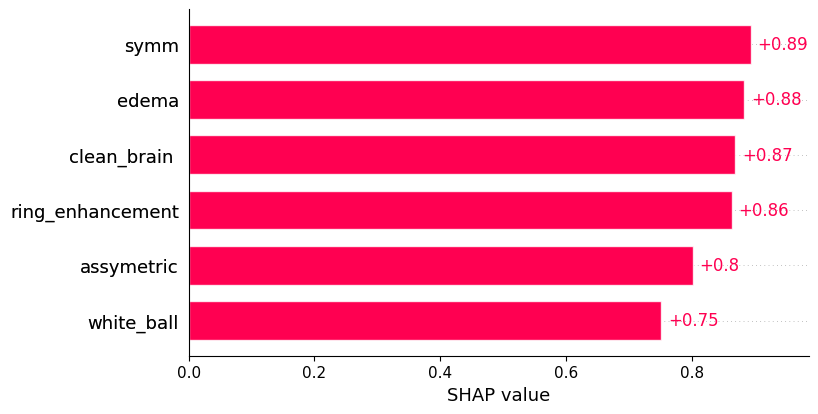

In [ ]:
shap.plots.bar(shap_values, max_display=10)
